# Proyecto 01

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
proyecto_data = np.load('./data/proyecto_training_data.npy')

In [3]:
proyecto_data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [48]:
class Proyecto():    
    test_size = 0.2

    #constructor
    def __init__(self, proyecto_data):
        self.proyecto_data = proyecto_data
        self.data_train, self.data_test = train_test_split(proyecto_data, test_size=self.test_size)

        self.df_train = pd.DataFrame(self.data_train)
        self.df_test = pd.DataFrame(self.data_test)
        
        self.df_train = self.df_train.rename(columns={0: "SalePrice", 1: "OverallQual", 2: "1stFlrSF", 3: "TotRmsAbvGrd", 4: "YearBuilt", 5: "LotFrontage"})
        self.df_test = self.df_test.rename(columns={0: "SalePrice", 1: "OverallQual", 2: "1stFlrSF", 3: "TotRmsAbvGrd", 4: "YearBuilt", 5: "LotFrontage"})
        
        
    def analisisExploratorio(self):
        df_train_explore = self.df_train.describe()
        df_test_explore = self.df_test.describe()
        return df_train_explore, df_test_explore
    
    def correlacionVariables(self):
        ind_var_columns = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]
        for colName in ind_var_columns:
            corr = self.df_train[colName].corr(self.df_train["SalePrice"])
            print(f"Corr {colName}: {corr}")
            plt.scatter(self.df_train[colName],self. df_train["SalePrice"], color = 'hotpink')
            plt.title(f"Corr {colName}: {'%.3f' % corr}")
            plt.show()
    
    def generarHistogramas(self):
        fig, axes = plt.subplots(3, 2, figsize=(15, 10))
        sns.histplot(data=self.df_train["SalePrice"], ax=axes[0,0])
        sns.histplot(data=self.df_train["OverallQual"], ax=axes[0,1])
        sns.histplot(data=self.df_train["1stFlrSF"], ax=axes[1,0])
        sns.histplot(data=self.df_train["TotRmsAbvGrd"], ax=axes[1,1])
        sns.histplot(data=self.df_train["YearBuilt"], ax=axes[2,0])
        sns.histplot(data=self.df_train["LotFrontage"], ax=axes[2,1])
    
                 
    def returnProyectoData(self):
        return f"{self.proyecto_data}"
    

In [49]:
Proyecto = Proyecto(proyecto_data)

In [50]:
df_train_explore, df_test_explore = Proyecto.analisisExploratorio()

In [51]:
df_train_explore

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,958.000000
mean,182361.828767,6.125856,1169.412671,6.565925,1971.577055,70.475992
std,78678.017128,1.388686,385.453006,1.643174,30.531525,24.766220
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,130000.000000,5.000000,894.000000,5.000000,1954.000000,60.000000
50%,165000.000000,6.000000,1096.000000,6.000000,1974.000000,70.000000
75%,215050.000000,7.000000,1405.500000,7.000000,2001.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [52]:
df_test_explore

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,292.000000,292.000000,292.000000,292.000000,292.000000,243.000000
mean,175158.664384,5.993151,1135.482877,6.325342,1970.030822,68.370370
std,82315.961784,1.357158,390.580047,1.539952,28.868509,22.254043
min,35311.000000,2.000000,480.000000,3.000000,1872.000000,21.000000
25%,128150.000000,5.000000,858.000000,5.000000,1953.750000,57.000000
50%,153500.000000,6.000000,1050.500000,6.000000,1970.000000,68.000000
75%,202500.000000,7.000000,1341.000000,7.000000,1998.250000,80.000000
max,745000.000000,10.000000,3228.000000,11.000000,2009.000000,174.000000


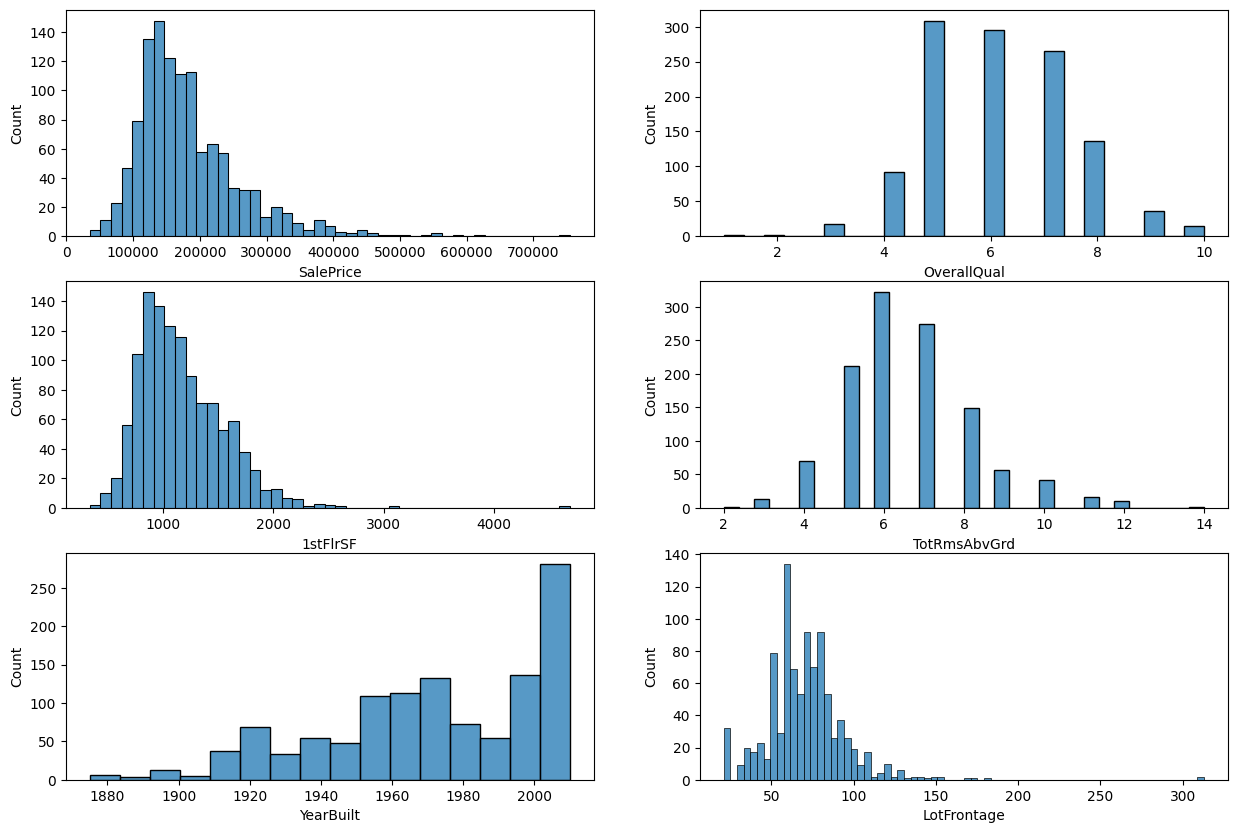

In [53]:
Proyecto.generarHistogramas()

Corr OverallQual: 0.795248172863331


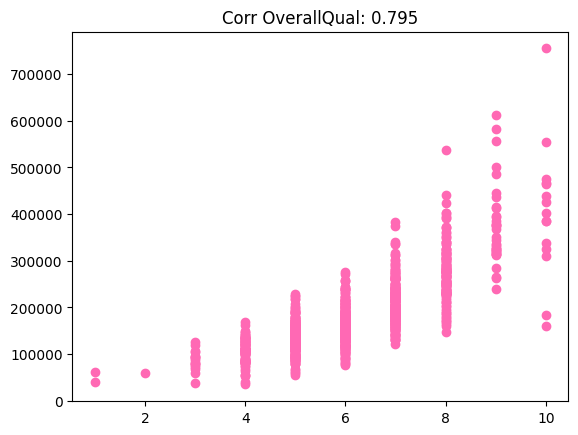

Corr 1stFlrSF: 0.595612679149857


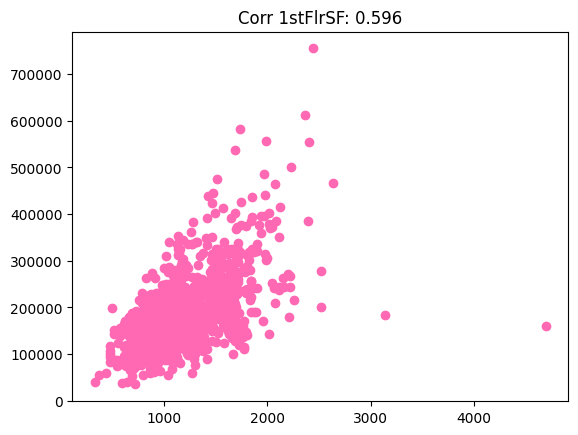

Corr TotRmsAbvGrd: 0.5158098641058819


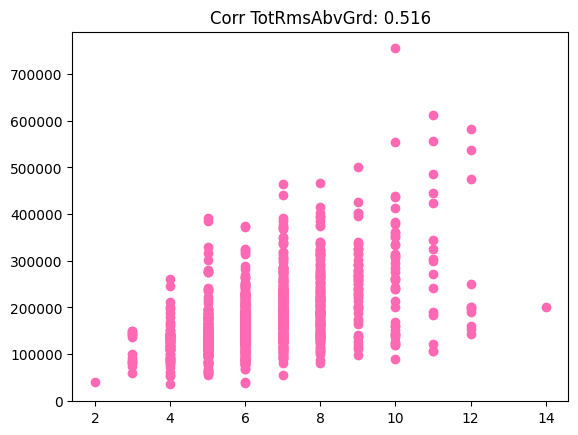

Corr YearBuilt: 0.5247843033993581


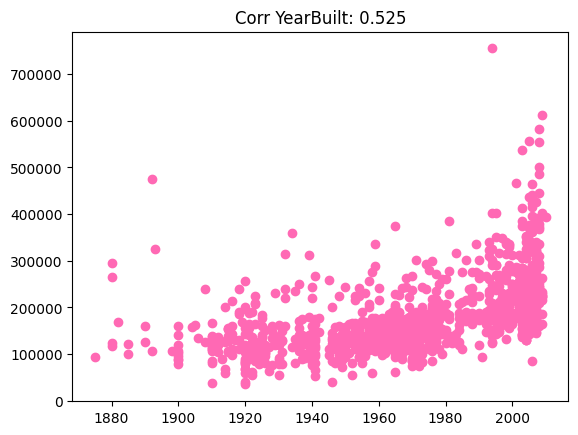

Corr LotFrontage: 0.3242649360606402


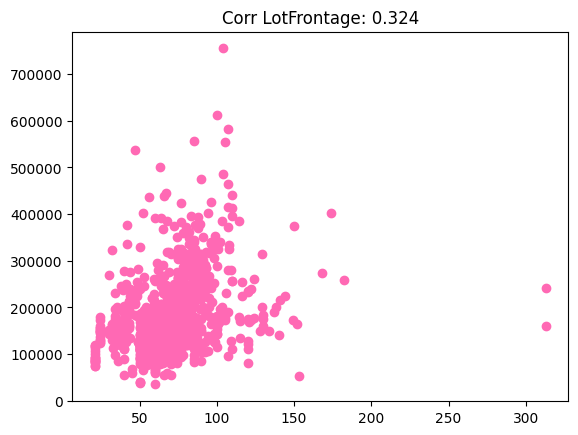

In [54]:
Proyecto.correlacionVariables()